In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv('BrentOilPrices.csv')

In [2]:
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [3]:
print(df.shape)

(9011, 2)


In [4]:
print(df.dtypes)

Date      object
Price    float64
dtype: object


In [5]:
# Convert Date column to datetime type
df['Date']=pd.to_datetime(df['Date'])
# Set Date column as the index
df.set_index('Date',inplace=True)

In [6]:
df

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2022-11-08,96.85
2022-11-09,93.05
2022-11-10,94.25


In [7]:
# Check data type of each column
index_type=df.index.dtype
print('Index data type:', index_type)
print(df.dtypes)

Index data type: datetime64[ns]
Price    float64
dtype: object


In [8]:
df.describe()

,Price
count,9011.000000
mean,48.420782
std,32.860110
min,9.100000
25%,19.050000
50%,38.570000
75%,70.090000
max,143.950000


In [9]:
#find null values
df.isnull().sum()

Price    0
dtype: int64

In [10]:
#find duplicates
df.duplicated().sum()

3996

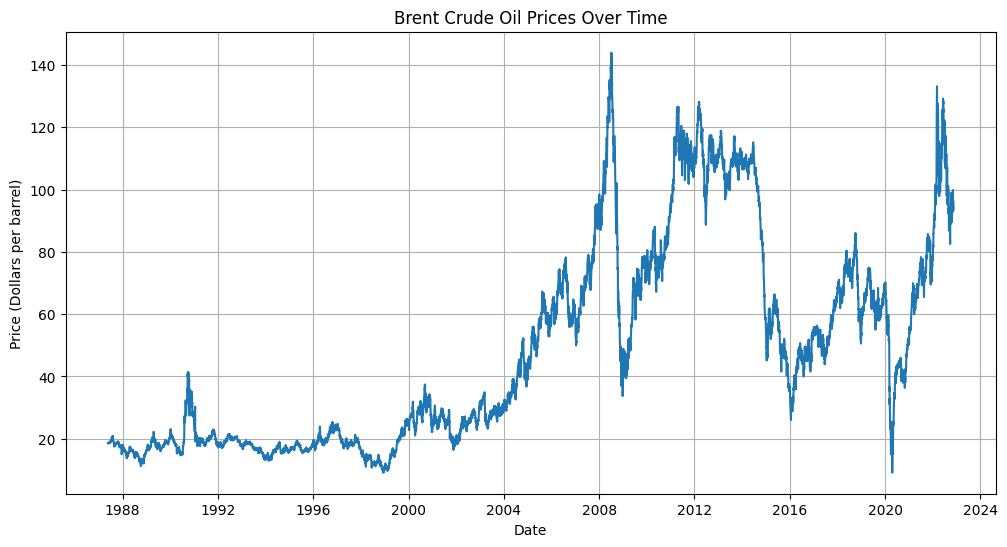

In [11]:
#Plotting the time series
plt.figure(figsize=(12,6))
plt.plot(df.index,df['Price'])
plt.title('Brent Crude Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (Dollars per barrel)')
plt.grid(True)
plt.show()

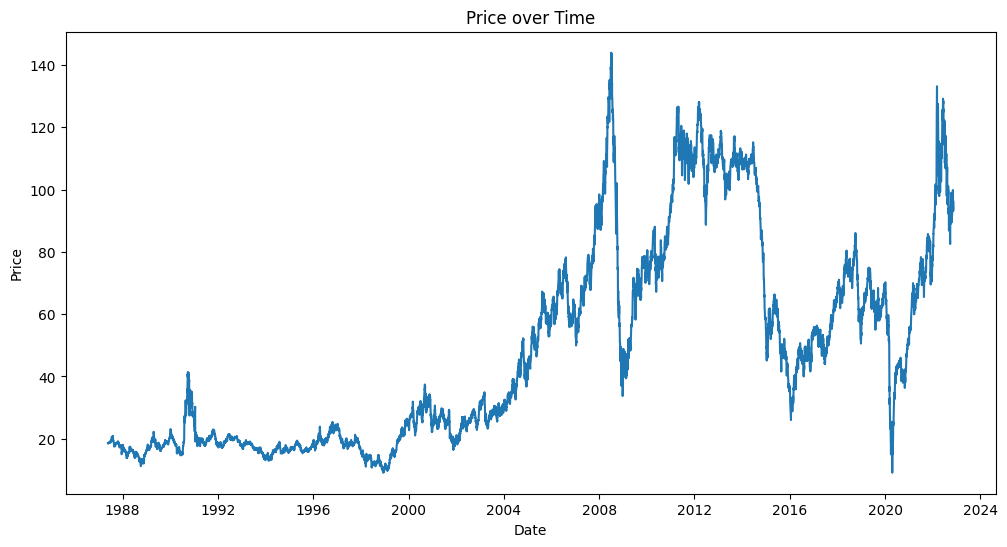

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Line Plot
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y='Price', data=df)
plt.title('Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


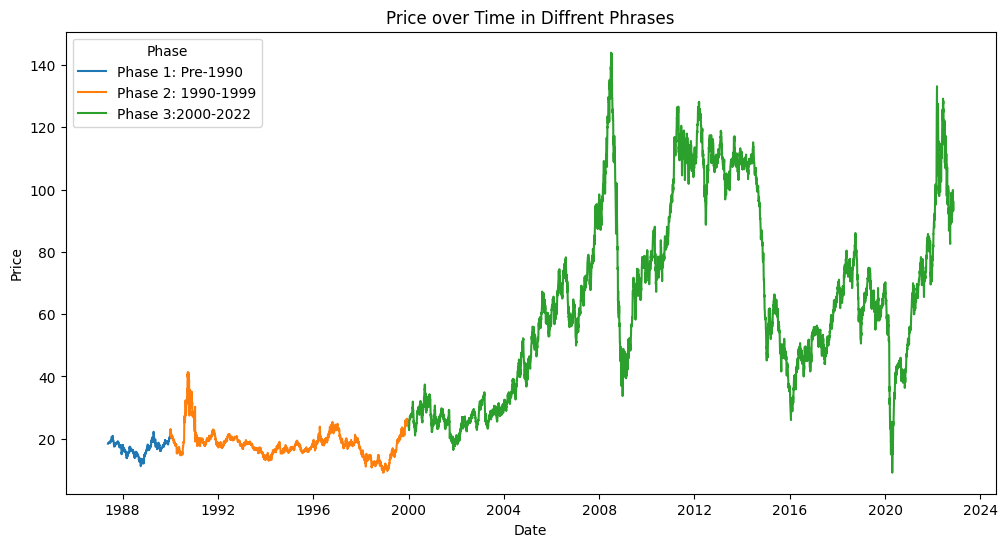

In [13]:
#plot through diffrent phases
plt.figure(figsize=(12,6))
df['Phase']=pd.cut(df.index, bins=pd.to_datetime(['1987-05-20','1990-01-01','1999-12-31','2022-12-19']), labels=['Phase 1: Pre-1990', 'Phase 2: 1990-1999', 'Phase 3:2000-2022'])
sns.lineplot(x=df.index, y='Price', hue='Phase', data=df)
plt.title('Price over Time in Diffrent Phrases')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

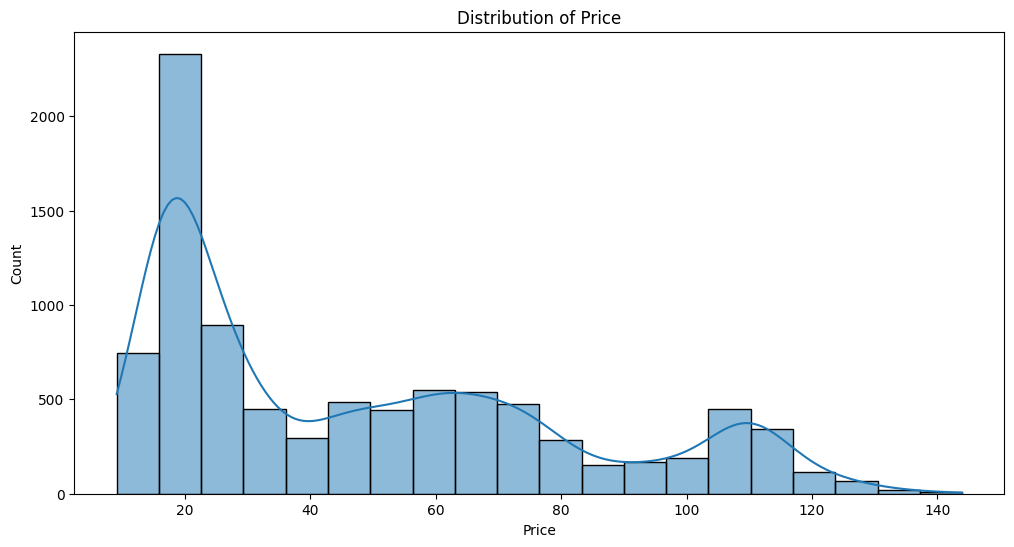

In [14]:
#Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Price', bins=20, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


In [15]:
#Stationary Check
from statsmodels.tsa.stattools import adfuller
#Perform Augmented Dickey-Fuller test
result=adfuller(df['Price'])

#Extract the p-value from the test results
p_value=result[1]

if p_value > 0.05:
    print('The Data is Non-Stationary.')
else:
    print('The Data is Stationary.')    

The Data is Non-Stationary.


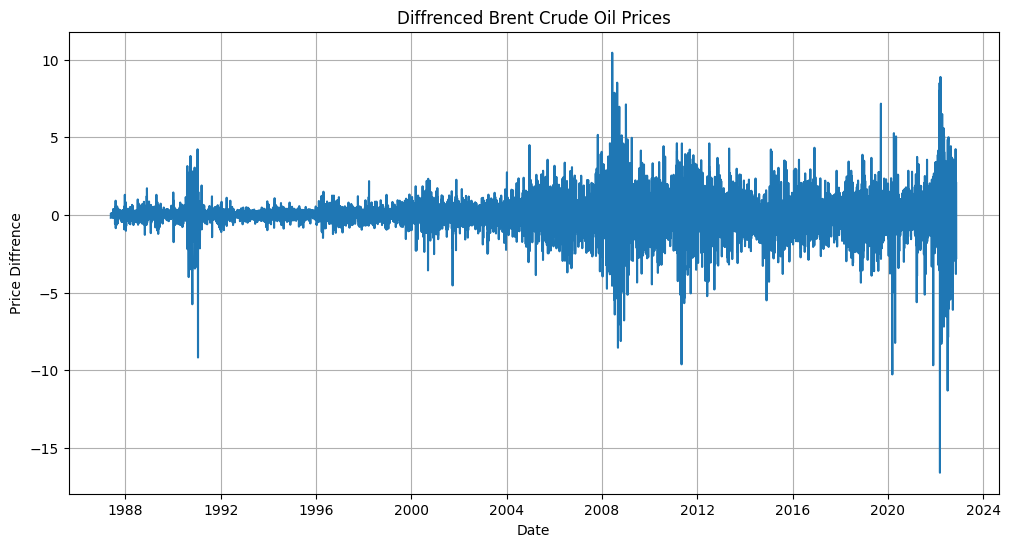

,Price,PriceDiff
Date,,
1987-05-20,18.63,NaN
1987-05-21,18.45,-0.18
1987-05-22,18.55,0.10
1987-05-25,18.60,0.05
1987-05-26,18.63,0.03
...,...,...
2022-11-08,96.85,-3.02
2022-11-09,93.05,-3.80
2022-11-10,94.25,1.20


In [16]:
#Converting Non-Stationary into Stationary
#Diffrencing
#perform differencing to make the data stationary
df['PriceDiff']=df['Price'].diff()
#plot diffrenced series
plt.figure(figsize=(12,6))
plt.plot(df.index, df['PriceDiff'])
plt.title('Diffrenced Brent Crude Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price Diffrence')
plt.grid(True)
plt.show()
df=df.drop('Phase',axis=1)
display(df)

ANAMOLY DETECTION AND TREATMENT

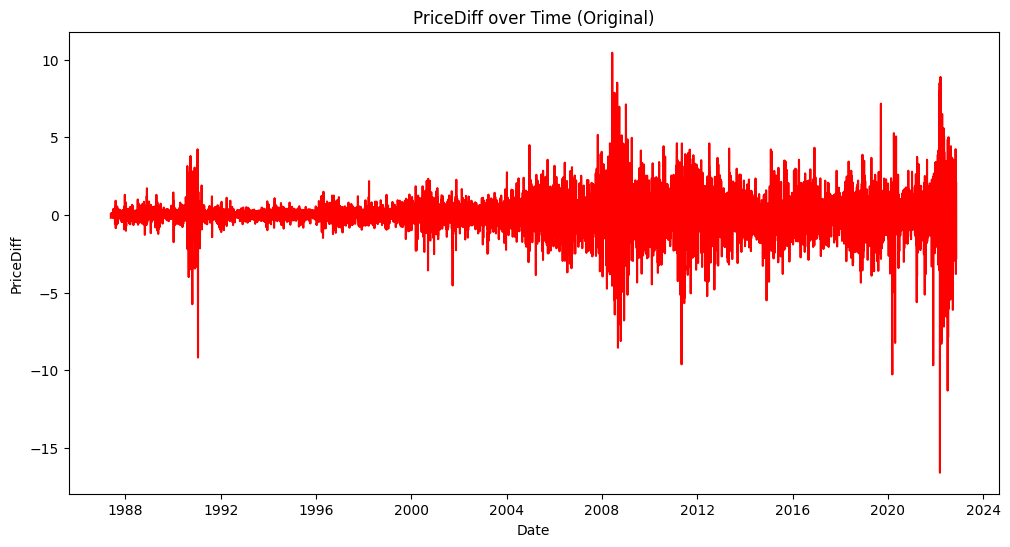

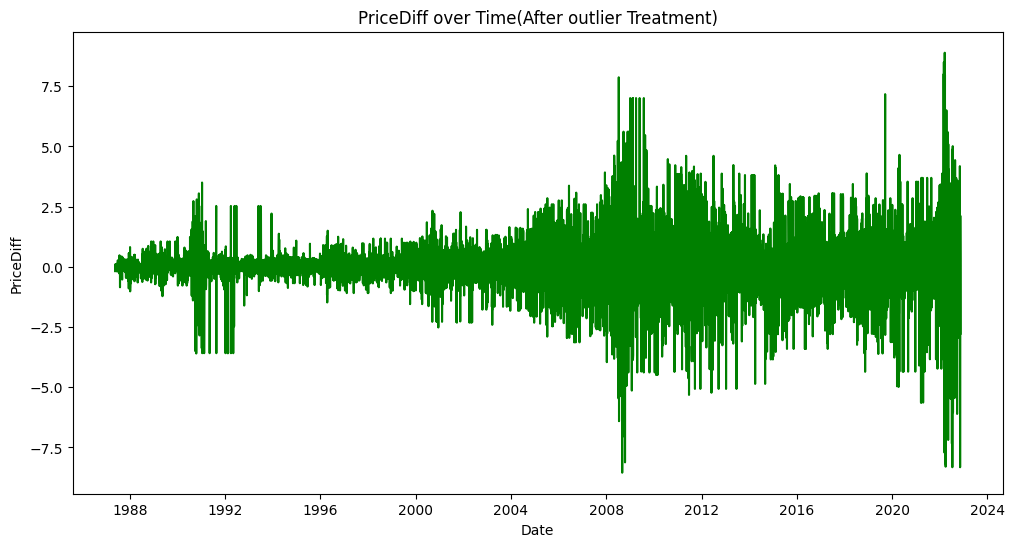

In [17]:
Data=df.copy()

#plotting the original data
plt.figure(figsize=(12,6))
sns.lineplot(x=Data.index, y='PriceDiff', data=Data,color='red')
plt.title('PriceDiff over Time (Original)')
plt.xlabel('Date')
plt.ylabel('PriceDiff')
plt.show()

#Calculate IQR for the past 12 months
rolling_iqr=Data['PriceDiff'].rolling(window=12).quantile(0.75) - Data['PriceDiff'].rolling(window=12).quantile(0.25)

#find outlier using the new IQR
outliers_upper=Data['PriceDiff'] > (Data['PriceDiff'].rolling(window=12).quantile(0.75) + 1.5 * rolling_iqr)
outliers_lower=Data['PriceDiff'] < (Data['PriceDiff'].rolling(window=12).quantile(0.25) - 1.5 * rolling_iqr)

#replace outliers with the boder values of the IQR
Data['PriceDiff_cleaned']=Data['PriceDiff'].copy()
Data.loc[outliers_upper, 'PriceDiff_cleaned']=Data.loc[outliers_upper, 'PriceDiff'].rolling(window=12).quantile(0.75)
Data.loc[outliers_lower, 'PriceDiff_cleaned']=Data.loc[outliers_lower, 'PriceDiff'].rolling(window=12).quantile(0.25)

#plotting the data after outlier treatment
plt.figure(figsize=(12,6))
sns.lineplot(x=Data.index, y='PriceDiff_cleaned', data=Data, color='green')
plt.title('PriceDiff over Time(After outlier Treatment)')
plt.xlabel('Date')
plt.ylabel('PriceDiff')
plt.show()

# Dropping the 'PriceDiff' column and renaming the 'PriceDiff_cleaned' column
Data_cleaned=Data.drop('PriceDiff', axis=1).rename(columns={'PriceDiff_cleaned': 'PriceDiff'})

#remove rows with missing values
Data_cleaned=Data_cleaned.dropna()

#Reset the index
Data_cleaned=Data_cleaned.reset_index()


In [18]:
Data_cleaned

,Date,Price,PriceDiff
0,1987-05-21,18.45,-0.1800
1,1987-05-22,18.55,0.1000
2,1987-05-25,18.60,0.0500
3,1987-05-26,18.63,0.0300
4,1987-05-27,18.60,-0.0300
...,...,...,...
8983,2022-11-08,96.85,-8.3225
8984,2022-11-09,93.05,-3.8000
8985,2022-11-10,94.25,1.2000
8986,2022-11-11,96.37,2.1200


In [19]:
#Convert Date column to datetime type
Data_cleaned['Date']=pd.to_datetime(Data_cleaned['Date'])

#Set Date clumn as the indexed
Data_cleaned.set_index('Date',inplace=True)

Data_cleaned

,Price,PriceDiff
Date,,
1987-05-21,18.45,-0.1800
1987-05-22,18.55,0.1000
1987-05-25,18.60,0.0500
1987-05-26,18.63,0.0300
1987-05-27,18.60,-0.0300
...,...,...
2022-11-08,96.85,-8.3225
2022-11-09,93.05,-3.8000
2022-11-10,94.25,1.2000


Model Building:
ARIMA Model


In [20]:
#Split the data into train and test
train_size=int(len(Data_cleaned)*0.8)
train_data, test_data=Data_cleaned[:train_size], Data_cleaned[train_size:]

In [21]:
test_data

,Price,PriceDiff
Date,,
2015-10-26,46.57,0.2700
2015-10-27,45.54,-1.0300
2015-10-28,47.60,2.7350
2015-10-29,48.04,0.4400
2015-10-30,48.00,-0.0400
...,...,...
2022-11-08,96.85,-8.3225
2022-11-09,93.05,-3.8000
2022-11-10,94.25,1.2000


c:\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python\Python312\Lib\site-package

RMSE: 1.6654552840901538
MAE: 1.14761409551181


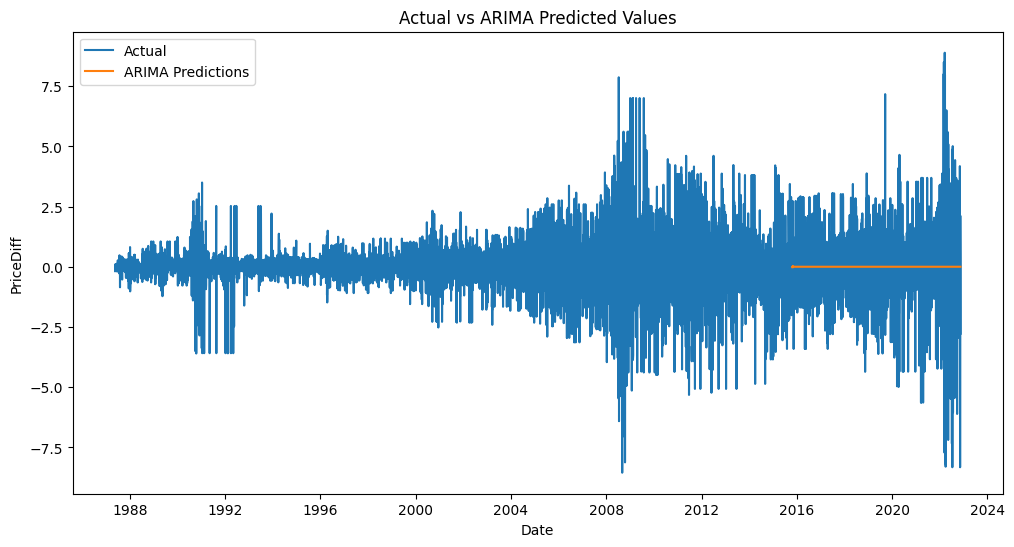

In [22]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
train_price=train_data['PriceDiff']

#Fit ARIMA model
arima_model=ARIMA(train_price, order=(2,1,2))
arima_model_fit=arima_model.fit()

#Forecast using Arima model
arima_predictions=arima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) -1, dynamic=False)

#Calculate performance metrics
arima_rmse=np.sqrt(mean_squared_error(test_data.loc[:, 'PriceDiff'], arima_predictions))
arima_mae=mean_absolute_error(test_data.loc[:, 'PriceDiff'], arima_predictions)

print('RMSE:', arima_rmse)
print('MAE:', arima_mae)

#plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(Data_cleaned.index, Data_cleaned['PriceDiff'], label='Actual')
plt.plot(test_data.index,arima_predictions, label='ARIMA Predictions')
plt.title('Actual vs ARIMA Predicted Values')
plt.xlabel('Date')
plt.ylabel('PriceDiff')
plt.legend()
plt.show()

SARIMA

c:\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


RMSE: 1.6697972882181449
MAE: 1.1570826859027223


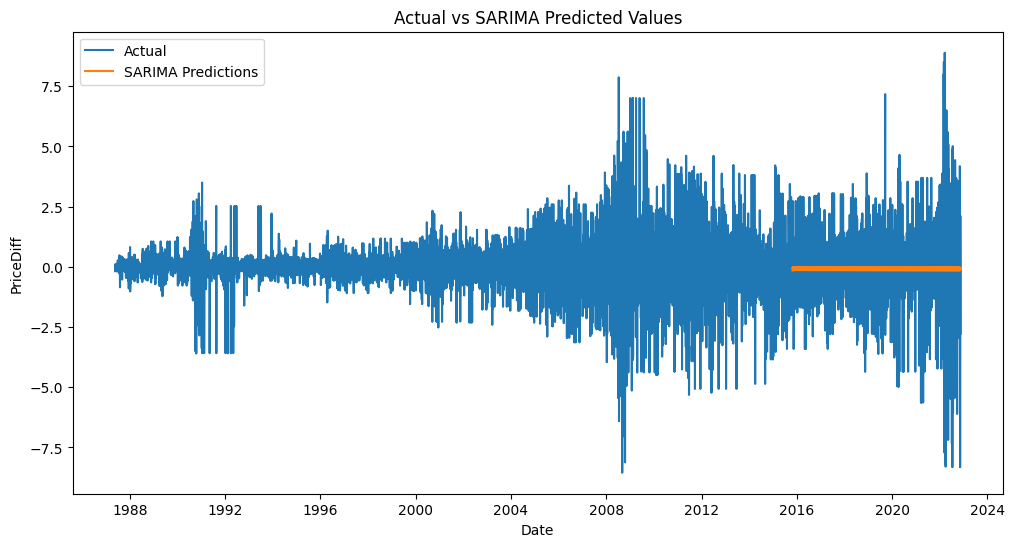

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Define the SARIMA model
sarima_model=SARIMAX(train_price, order=(1,1,1), seasonal_order=(1,1,1,12))

#Fit the SARIMA model
sarima_model_fit=sarima_model.fit()

#Forecast using SARIMA model
sarima_predictions=sarima_model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)

#Calculate performance metrics
sarima_rmse=np.sqrt(mean_squared_error(test_data.loc[:, 'PriceDiff'], sarima_predictions))
sarima_mae=mean_absolute_error(test_data.loc[:, 'PriceDiff'], sarima_predictions)

print('RMSE:', sarima_rmse)
print('MAE:', sarima_mae)

#plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(Data_cleaned.index, Data_cleaned['PriceDiff'], label='Actual')
plt.plot(test_data.index,sarima_predictions, label='SARIMA Predictions')
plt.title('Actual vs SARIMA Predicted Values')
plt.xlabel('Date')
plt.ylabel('PriceDiff')
plt.legend()
plt.show()

LSTM

In [24]:
Data_cleaned

,Price,PriceDiff
Date,,
1987-05-21,18.45,-0.1800
1987-05-22,18.55,0.1000
1987-05-25,18.60,0.0500
1987-05-26,18.63,0.0300
1987-05-27,18.60,-0.0300
...,...,...
2022-11-08,96.85,-8.3225
2022-11-09,93.05,-3.8000
2022-11-10,94.25,1.2000


Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0283
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0041
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0040
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0040
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0039
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0038
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0039
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0038
Epoch 9/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0041
Epoch 10/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0038
Epoch 11/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0042
Epoch 12/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0040
Epoch 13/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0039
Epoch 14/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0041
Epoch 15/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - l

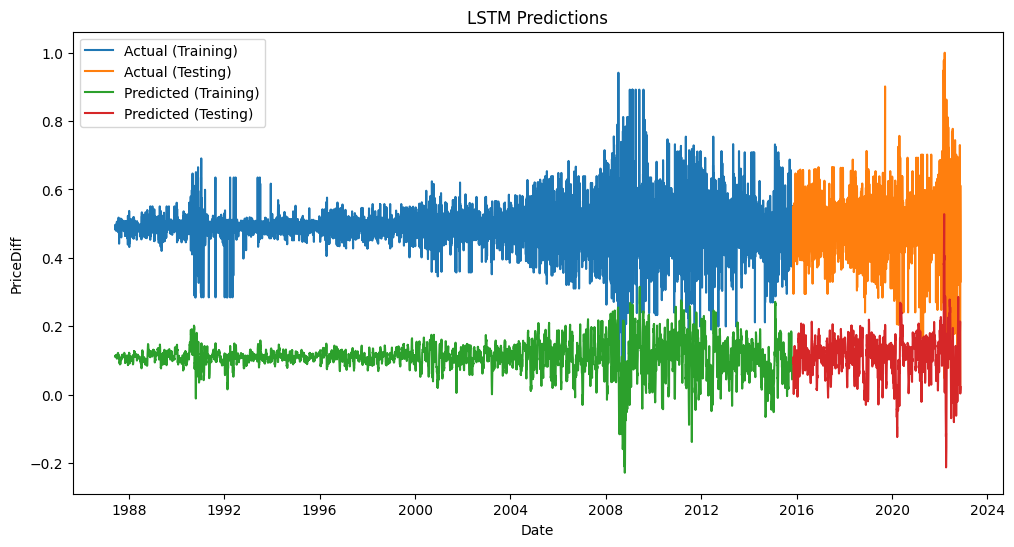

Training RMSE: 0.38817394770737706
Training MSE: 0.1506790136787295
Training MAE: 0.38078727876143165
Testing RMSE: 0.3971940186867398
Testing MSE: 0.1577630884805222
Testing MAE: 0.381863737400914


In [25]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential,load_model
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Preprocess the data
scaled_data = scaler.fit_transform(Data_cleaned[['PriceDiff']])

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Prepare the data for LSTM
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset[i:i+time_steps])
        y.append(dataset[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 10  # Number of time steps to consider
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(units=1))

# Compile and train the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32)

# Save the model using Keras' save method
model_path = "lstm_model.keras"
lstm_model.save(model_path)

# Load the saved LSTM model
model = load_model(model_path)

# Make predictions
train_predictions = lstm_model.predict(X_train)
test_predictions = lstm_model.predict(X_test)

# Inverse scale the predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

# Save the model using joblib
#import joblib
#Fuelmodel = "lstm_model.joblib"
#joblib.dump(lstm_model, Fuelmodel)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(Data_cleaned.index[time_steps:train_size], y_train, label='Actual (Training)')
plt.plot(Data_cleaned.index[train_size+time_steps:], y_test, label='Actual (Testing)')
plt.plot(Data_cleaned.index[time_steps:train_size], train_predictions, label='Predicted (Training)')
plt.plot(Data_cleaned.index[train_size+time_steps:], test_predictions, label='Predicted (Testing)')
plt.title('LSTM Predictions')
plt.xlabel('Date')
plt.ylabel('PriceDiff')
plt.legend()
plt.show()

from sklearn.metrics import mean_absolute_error


# Calculate performance metrics
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
train_mse = mean_squared_error(y_train, train_predictions)
train_mae = mean_absolute_error(y_train, train_predictions)

test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
test_mse = mean_squared_error(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Print performance metrics
print("Training RMSE:", train_rmse)
print("Training MSE:", train_mse)
print("Training MAE:", train_mae)

print("Testing RMSE:", test_rmse)
print("Testing MSE:", test_mse)
print("Testing MAE:", test_mae)



In [26]:
# Convert Data_cleaned to CSV with index
Data_cleaned.to_csv("Cleaned_data.csv")

# Read the CSV file with index column
cleaned_data = pd.read_csv("Cleaned_data.csv", index_col="Date")

# Print the contents of the DataFrame
cleaned_data

,Price,PriceDiff
Date,,
1987-05-21,18.45,-0.1800
1987-05-22,18.55,0.1000
1987-05-25,18.60,0.0500
1987-05-26,18.63,0.0300
1987-05-27,18.60,-0.0300
...,...,...
2022-11-08,96.85,-8.3225
2022-11-09,93.05,-3.8000
2022-11-10,94.25,1.2000
